# Analyse des passagers du Titanic: caractéristiques et sort 

Version du permier mai 2022




## Importer les librairies nécessaires

In [188]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import copy
import re
import csv

# Importer le fichier



In [4]:
### Lire le fichier et afficher les premières lignes

chemin = 'data/liste_passagers_titanic.csv'

obs = pd.read_csv(chemin, sep=';')

### Les deux prochaines lignes remplacent l'index par défaut 0 à n
#  avec un index de 1 à n
obs['new_col'] = range(1, len(obs) + 1)
obs.set_index('new_col', inplace=True)

obs.tail()

,Name,Age,Class,Ticket,Joined,Job,Fate,Sex
new_col,,,,,,,,
2451,"ABĪ ĀSĪ ḤANNĀ, Mr Mansūr",27.0,3rd Class Passenger,2663\r\n£7 4s 7d,Cherbourg,,Survivor,M
2452,"ØSTBY, Miss Helen Ragnhild",22.0,1st Class Passenger,113509\r\n£61 19s 7d,Southampton,,Survivor,F
2453,"ÖDAHL, Mr Nils Martin",23.0,3rd Class Passenger,7267\r\n£9 4s 6d,Southampton,General Labourer,Dead,M
2454,"ÖHMAN, Miss Velin",22.0,3rd Class Passenger,347085\r\n£7 15s 6d,Southampton,,Survivor,F
2455,"āDAH, Mr Mauritz",30.0,3rd Class Passenger,7076\r\n£7 5s,Southampton,General Labourer,Dead,M


In [5]:
### Inspecter les propriétés du tableau:
# les types (ou classes) des colonnes et les valeurs non-nulles
obs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2455 entries, 1 to 2455
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    2455 non-null   object 
 1   Age     2426 non-null   float64
 2   Class   2455 non-null   object 
 3   Ticket  1348 non-null   object 
 4   Joined  2455 non-null   object 
 5   Job     2455 non-null   object 
 6   Fate    2455 non-null   object 
 7   Sex     2455 non-null   object 
dtypes: float64(1), object(7)
memory usage: 172.6+ KB


In [6]:
## Nombre de lignes et de colonnes du tableau
obs.shape

(2455, 8)

In [7]:
### Liste des colonnes, i.e. variables
list(obs.columns)

['Name', 'Age', 'Class', 'Ticket', 'Joined', 'Job', 'Fate', 'Sex']

# Inspecter, nettoyer les noms

In [8]:
### Inspecter les noms
#  Il y a des caractères UTF-8 dans les noms
list(obs.head(10).Name), obs.head(10)

(['ABBING,\xa0Mr\xa0Anthony',
  'ABBOTT,\xa0Mr\xa0Ernest Owen',
  'ABBOTT,\xa0Mr\xa0Eugene Joseph',
  'ABBOTT,\xa0Mr\xa0Rossmore Edward',
  "ABBOTT,\xa0Mrs\xa0Rhoda Mary 'Rosa'",
  'ABELSETH,\xa0Miss\xa0Karen Marie',
  'ABELSETH,\xa0Mr\xa0Olaus JÃ¸rgensen',
  'ABELSON,\xa0Mr\xa0Samuel',
  'ABELSON,\xa0Mrs\xa0Hannah',
  'ABRAHAMSSON,\xa0Mr\xa0Abraham August Johannes'],
                                             Name   Age                Class  \
 new_col                                                                       
 1                             ABBING, Mr Anthony  42.0  3rd Class Passenger   
 2                         ABBOTT, Mr Ernest Owen  21.0     Victualling Crew   
 3                       ABBOTT, Mr Eugene Joseph  13.0  3rd Class Passenger   
 4                     ABBOTT, Mr Rossmore Edward  16.0  3rd Class Passenger   
 5                  ABBOTT, Mrs Rhoda Mary 'Rosa'  39.0  3rd Class Passenger   
 6                     ABELSETH, Miss Karen Marie  16.0  3rd Class Pa

In [9]:
### Combien il y en a ? 
#  Pratiquement pour toutes les lignes 
len(obs[obs['Name'].str.contains('\xa0')])

2450

In [10]:
### Application ligne par ligne de la fonction de remplacement
#  Un espace remplace le caractère non-souhaité

obs['Name'] = obs['Name'].apply(lambda x : x.replace('\xa0',' '))

# Inspecter, nettoyer les prix des billets

In [11]:
### Inspecter les valeurs de la colonne
list(obs.head(10).Ticket), obs['Ticket'].head(10)

(['5547\r\n£7 11s',
  nan,
  'CA2673\r\n£20 5s',
  'CA2673\r\n£20 5s',
  'CA2673\r\n£20 5s',
  '348125\r\n£7 13s',
  '348122\r\n£7 13s',
  '3381\r\n£24',
  '3381\r\n£24',
  '3101284\r\n£7 18s 6d'],
 new_col
 1           5547\r\n£7 11s
 2                      NaN
 3         CA2673\r\n£20 5s
 4         CA2673\r\n£20 5s
 5         CA2673\r\n£20 5s
 6         348125\r\n£7 13s
 7         348122\r\n£7 13s
 8              3381\r\n£24
 9              3381\r\n£24
 10    3101284\r\n£7 18s 6d
 Name: Ticket, dtype: object)

In [12]:
### Utiliser le signe de retour à la ligne pour séparer les valeurs
#  Ne retenir à la sortie que le prix, non le n° de ticket1
ticket = 'CA2673\r\n£20 5s'
ticket.split('\r\n'), ticket.split('\r\n')[1]

(['CA2673', '£20 5s'], '£20 5s')

In [13]:
### Quelle est la classe de la variable de sortie
type(ticket)

str

In [14]:
### Création de la fonction qui permet d'extraire le prix
#  et vérifie avant qu'il s'agit d'une chaîne de caractères
#  et non d'un nombre ou vide
def split_prix (ticket):
    result = ''
    try:
        result = ticket.split('\r\n')[1]
    except:
        result = 'verifier'
    return result  

### Exemple d'utilisation
split_prix(ticket)

'£20 5s'

In [15]:
### Appliquer la fonction
obs['Prix'] = obs['Ticket'].apply(split_prix)
obs.head()

,Name,Age,Class,Ticket,Joined,Job,Fate,Sex,Prix
new_col,,,,,,,,,
1,"ABBING, Mr Anthony",42.0,3rd Class Passenger,5547\r\n£7 11s,Southampton,Blacksmith,Dead,M,£7 11s
2,"ABBOTT, Mr Ernest Owen",21.0,Victualling Crew,NaN,Southampton,Lounge Pantry Steward,Dead,M,verifier
3,"ABBOTT, Mr Eugene Joseph",13.0,3rd Class Passenger,CA2673\r\n£20 5s,Southampton,Scholar,Dead,M,£20 5s
4,"ABBOTT, Mr Rossmore Edward",16.0,3rd Class Passenger,CA2673\r\n£20 5s,Southampton,Jeweller,Dead,M,£20 5s
5,"ABBOTT, Mrs Rhoda Mary 'Rosa'",39.0,3rd Class Passenger,CA2673\r\n£20 5s,Southampton,,Survivor,F,£20 5s


In [16]:
### Combien de modalités a la variable 'Prix'
#  qui en l'état est une variable qualitative
vc = obs['Prix'].value_counts()
len(vc)

286

In [17]:
### Les valeurs qui ont posé problème à la fonction
obs[obs['Prix']=='verifier'].Ticket.value_counts()

250654    8
370160    5
239853    3
112058    2
112050    1
112051    1
7         1
239854    1
112059    1
239855    1
112052    1
19972     1
50        1
239856    1
Name: Ticket, dtype: int64

In [18]:
### Inspecter un exemple
obs[obs['Ticket'] == '250654']

,Name,Age,Class,Ticket,Joined,Job,Fate,Sex,Prix
new_col,,,,,,,,,
270,"BRAILEY, Mr William Theodore Ronald",24.0,2nd Class Passenger\r\nMusician,250654,Southampton,Musician,Dead,M,verifier
282,"BRICOUX, Mr Roger Marie",20.0,2nd Class Passenger\r\nMusician,250654,Southampton,Musician,Dead,M,verifier
438,"CLARKE, Mr John Frederick Preston",28.0,2nd Class Passenger\r\nMusician,250654,Southampton,Musician,Dead,M,verifier
949,"HARTLEY, Mr Wallace Henry",33.0,2nd Class Passenger\r\nMusician,250654,Southampton,Musician,Dead,M,verifier
1062,"HUME, Mr John Law",21.0,2nd Class Passenger\r\nMusician,250654,Southampton,Musician,Dead,M,verifier
1247,"KRINS, Mr Georges Alexandre",23.0,2nd Class Passenger\r\nMusician,250654,Southampton,Musician,Dead,M,verifier
2197,"TAYLOR, Mr Percy Cornelius",40.0,2nd Class Passenger\r\nMusician,250654,Southampton,Musician,Dead,M,verifier
2422,"WOODWARD, Mr John Wesley",32.0,2nd Class Passenger\r\nMusician,250654,Southampton,Musician,Dead,M,verifier


In [19]:
vc

verifier      1135
£8 1s           60
£13             59
£7 15s          55
£7 17s 11d      51
              ... 
£7 15s 8d        1
£15 11s 7d       1
£49 10s          1
£7 2s 10d        1
£7 17s 6d        1
Name: Prix, Length: 286, dtype: int64

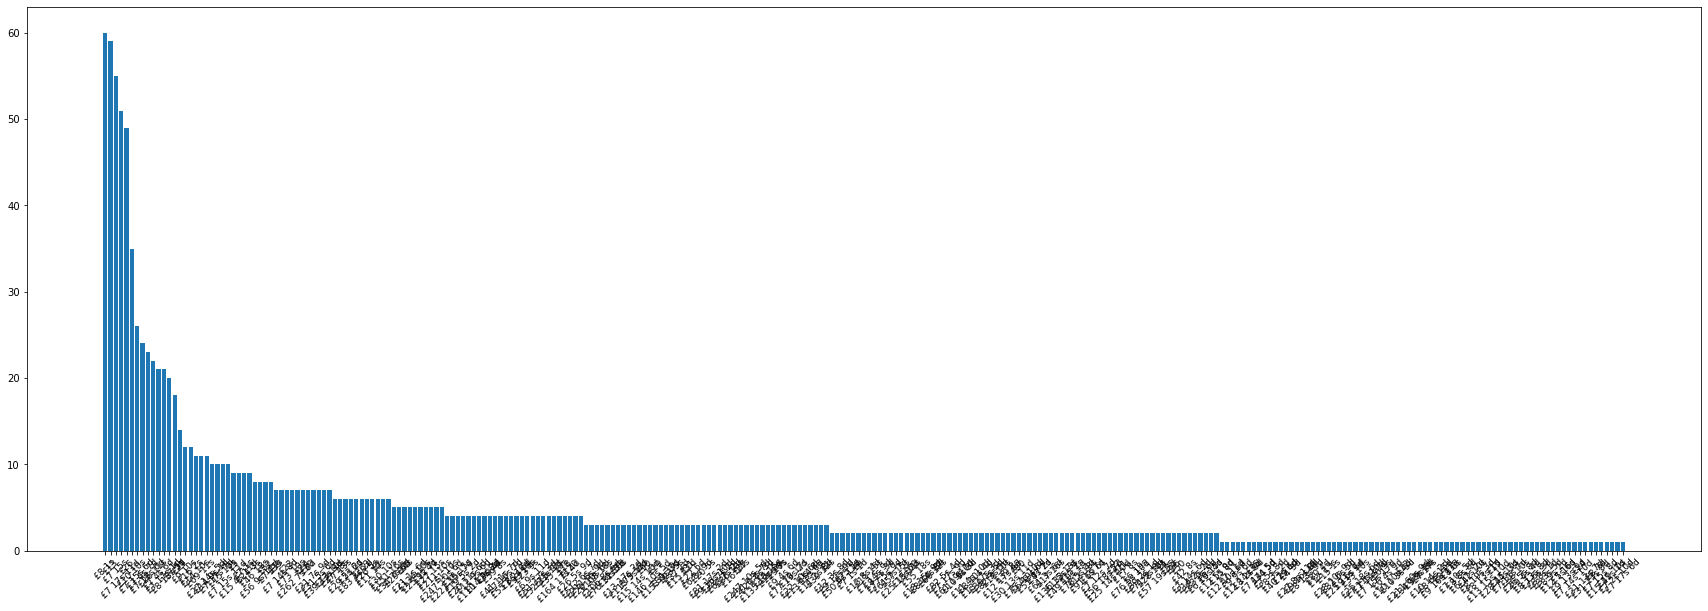

In [20]:
### Représentation graphique sans les effectifs de 'vérifier'
fig = plt.figure(figsize=[30,10])
plt.bar(vc[1:].index,vc[1:].values)
plt.xticks(rotation=45, size=9)
plt.show()

In [21]:
lp = list(vc.tail().index)
lp

['£7 15s 8d', '£15 11s 7d', '£49 10s', '£7 2s 10d', '£7 17s 6d']

## Conversion prix de chaîne de caractères vers valeurs décimales

12 pence in a shilling and 20 shillings a £ sterling, or 240 pence make a £

Lsd: https://en.wikipedia.org/wiki/%C2%A3sd 

Lsd: spoken as "pounds, shillings and pence" or pronounced /ɛl.ɛsˈdiː/ ell-ess-DEE

£7 11s 7d 

In [22]:
### Exemple de calcul de conversion de décimale
7 + 17/20 + 6/240 

7.875

In [23]:
### Les valeurs à convertir
list(vc.index)[:10]

['verifier',
 '£8 1s',
 '£13',
 '£7 15s',
 '£7 17s 11d',
 '£26',
 '£10 10s',
 '£7 15s 6d',
 '£7 4s 7d',
 '£7 18s 6d']

### Expression régulières

Extraitre ou manipuler des structures textuelles

* [Regular Expression HOWTO](https://docs.python.org/3/howto/regex.html)
* Schultz/Bussonnier, Python pour les SHS, p.241sq

In [26]:
### Définier le modèle à trouver,
#  tous les numéros de 1 à trois chiffres, y compris l'absence de valeurs
r = re.compile('\d{0,3}')
r

re.compile(r'\d{0,3}', re.UNICODE)

In [36]:
### Extraire tous les chiffres de la chaîne de caractères
s1 = '£8   s'
s2 = '£46 18s'
s3 = '£56 9s 11d'
l = [s1,s2,s3]


for e in l:
    result = []
    er = r.findall(e)
    for n in er:
        if n.isnumeric():    
            result.append(n)
        else :
            pass
    print(result)

['8']
['46', '18']
['56', '9', '11']


In [37]:
### Préparation d'une fonction qui transforme les valeurs Lsd en décimales

for p in obs.tail().Prix.values:
    l = r.findall(p)
    li = [int(t) for t in l if t.isnumeric()]
    if len(li) == 3:
        try:
            d = li[2]/240
        except:
            print(li, p)
        try:
            s = li[1]/20
        except:
            print(li, p)
        L = li[0]
        
        out= L + s + d
        
    elif len(li) == 2:
        try:
            s = li[1]/20
        except:
            print(li, p)
        L = li[0]
        
        out= L 
        
    elif len(li) == 1:

        L = li[0]
        
        out= L

    else:
        out = 99999
        
    print(round(out,3))

7.229
61.979
9.225
7.775
7


In [40]:
### Création de la fonction
def lsd_to_decimal(p):
    r = re.compile('\d{0,3}')
    if p != 'verif' :
        l = r.findall(p)
        li = [int(t) for t in l if t.isnumeric()]


        if len(li) == 3:
            try:
                d = li[2]/240
            except:
                print(li, p)
            try:
                s = li[1]/20
            except:
                print(li, p)
            L = li[0]

            out= L + s + d

        elif len(li) == 2:
            try:
                s = li[1]/20
            except:
                print(li, p)
            L = li[0]

            out= L + s

        elif len(li) == 1:

            L = li[0]

            out= L

        else:
            out = 77777

        rr = round(out,3)

        

    else:
        rr = 99999
    
    return rr
   
## test de la fonction sur une valeur    
lsd_to_decimal(s1),lsd_to_decimal(s2),lsd_to_decimal(s3)    

(8, 46.9, 56.496)

In [41]:
### Application à la table
obs['Prix_dec'] = obs['Prix'].apply(lsd_to_decimal)
obs

,Name,Age,Class,Ticket,Joined,Job,Fate,Sex,Prix,Prix_dec
new_col,,,,,,,,,,
1,"ABBING, Mr Anthony",42.0,3rd Class Passenger,5547\r\n£7 11s,Southampton,Blacksmith,Dead,M,£7 11s,7.550
2,"ABBOTT, Mr Ernest Owen",21.0,Victualling Crew,NaN,Southampton,Lounge Pantry Steward,Dead,M,verifier,77777.000
3,"ABBOTT, Mr Eugene Joseph",13.0,3rd Class Passenger,CA2673\r\n£20 5s,Southampton,Scholar,Dead,M,£20 5s,20.250
4,"ABBOTT, Mr Rossmore Edward",16.0,3rd Class Passenger,CA2673\r\n£20 5s,Southampton,Jeweller,Dead,M,£20 5s,20.250
5,"ABBOTT, Mrs Rhoda Mary 'Rosa'",39.0,3rd Class Passenger,CA2673\r\n£20 5s,Southampton,,Survivor,F,£20 5s,20.250
...,...,...,...,...,...,...,...,...,...,...
2451,"ABĪ ĀSĪ ḤANNĀ, Mr Mansūr",27.0,3rd Class Passenger,2663\r\n£7 4s 7d,Cherbourg,,Survivor,M,£7 4s 7d,7.229
2452,"ØSTBY, Miss Helen Ragnhild",22.0,1st Class Passenger,113509\r\n£61 19s 7d,Southampton,,Survivor,F,£61 19s 7d,61.979
2453,"ÖDAHL, Mr Nils Martin",23.0,3rd Class Passenger,7267\r\n£9 4s 6d,Southampton,General Labourer,Dead,M,£9 4s 6d,9.225


In [49]:
### Nombre d'erreurs / valeurs à vérifier
len(obs[obs['Prix_dec'] == 99999])

0

In [50]:
### Nombre d'erreurs / valeurs à vérifier
len(obs[obs['Prix_dec'] == 77777])

1135

In [53]:
### Distribution des prix décimaux
#  Noter qu'on exclut les individus qui n'ont pas de billet
obs[obs['Prix_dec'] != 77777].Prix_dec.describe()

count    1320.000000
mean       33.150223
std        51.820787
min         1.000000
25%         7.896000
50%        14.454000
75%        31.068750
max       512.329000
Name: Prix_dec, dtype: float64

In [70]:
### Vérification de la valeur qui pose problème: 'verifier'
obs.Prix_dec.value_counts()

77777.000    1135
8.050          60
13.000         59
7.750          55
7.896          51
             ... 
12.525          1
8.350           1
7.783           1
15.579          1
7.875           1
Name: Prix_dec, Length: 283, dtype: int64

(1.0, 512.329)

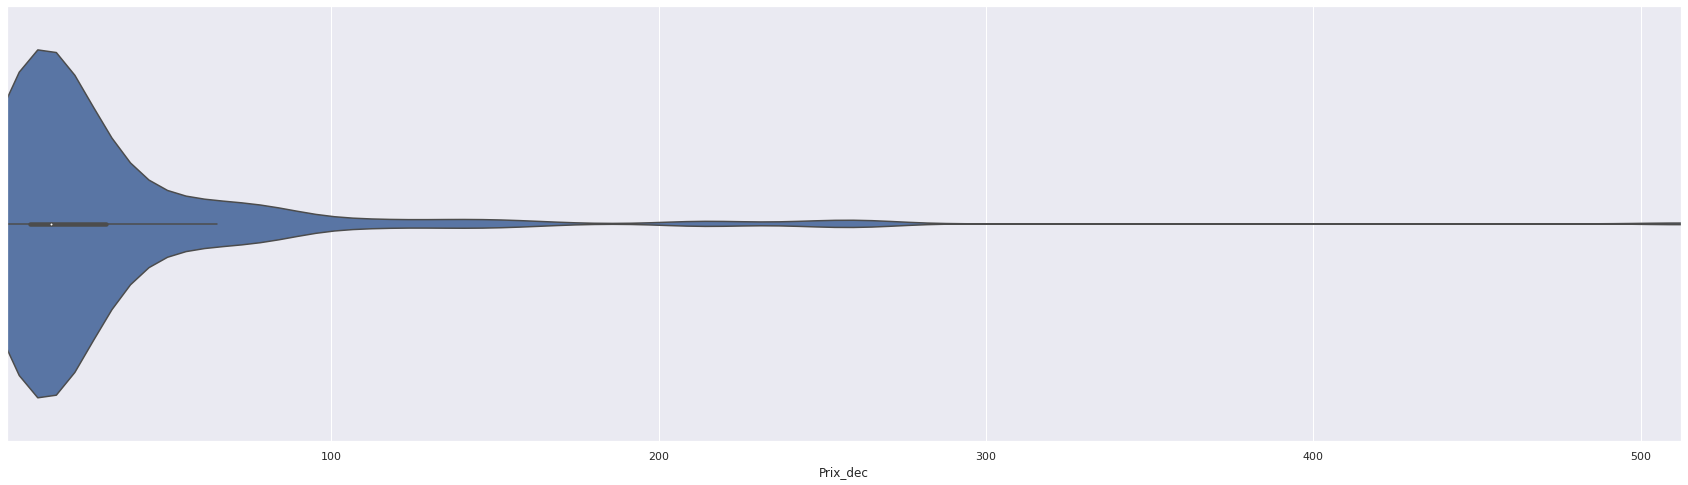

In [66]:
### Distribution et densité des prix

sns.set_theme(style="whitegrid")

sns.set(rc={"figure.figsize":(30, 8)})

a = obs[obs['Prix_dec'] != 77777]["Prix_dec"]

ax = sns.violinplot(x=a)

### Noter que au delà des limites les valeurs sont postulées
ax.set_xlim(left=min(a), right=max(a))



(1.0, 31.683)

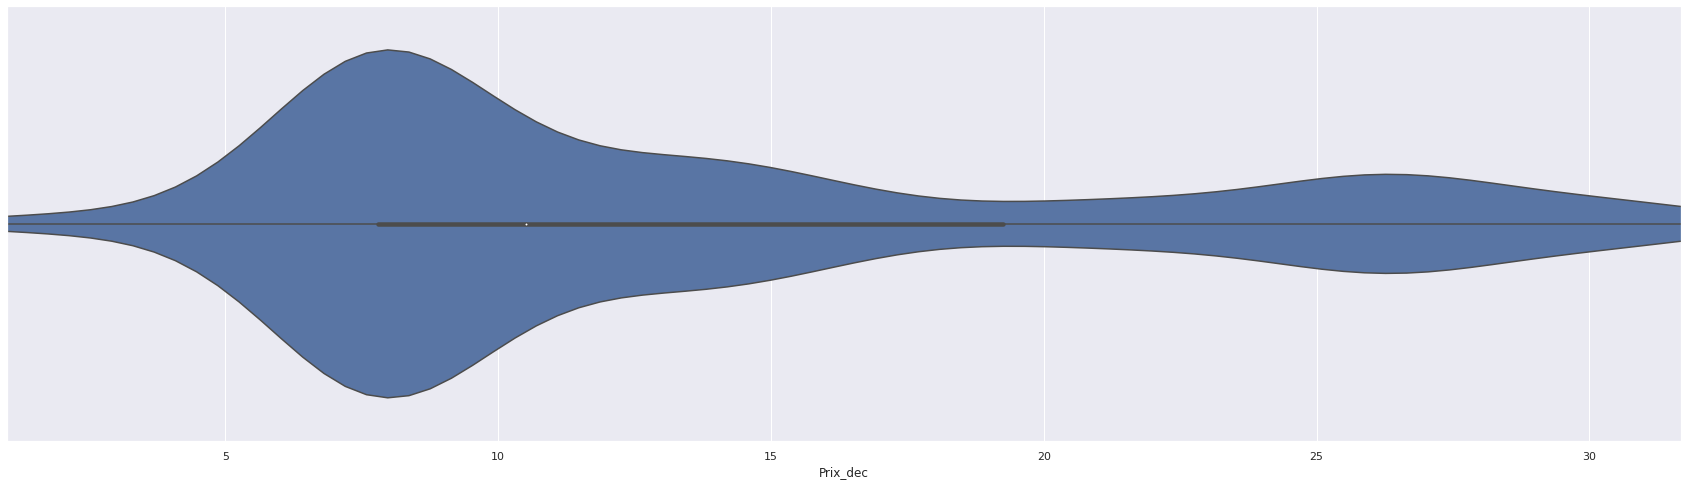

In [67]:
### Limiter aux trois premiers quartiles

sns.set_theme(style="whitegrid")

sns.set(rc={"figure.figsize":(30, 8)})

a = obs[obs['Prix_dec'] < 32]["Prix_dec"]

ax = sns.violinplot(x=a)

### Noter que au delà des limites les valeurs sont postulées
ax.set_xlim(left=min(a), right=max(a))



# Class

In [71]:
### Modalités et distribution par classe
#  Noter le nettoyage des retours à la ligne
#  Noter que certains passager traversent la Manche 
#  et ne continuent pas : 'cross channel'
class_l = obs.Class.apply(lambda x : x.replace('\r\n', ' ')).value_counts()
class_l.sort_index()

1st Class Passenger                            286
1st Class Passenger Cross Channel Passenger     22
1st Class Passenger H&W Guarantee Group          4
1st Class Passenger Servant                     38
2nd Class Passenger                            265
2nd Class Passenger Cross Channel Passenger     10
2nd Class Passenger H&W Guarantee Group          5
2nd Class Passenger Musician                     8
2nd Class Passenger Servant                      5
3rd Class Passenger                            709
Deck Crew                                       89
Deck Crew Titanic Officers                      10
Engineering Crew                               502
Restaurant Staff                                69
Victualling Crew                               429
Victualling Crew Postal Clerk                    4
Name: Class, dtype: int64

In [74]:
obs[obs['Class'].str.contains('Musician')]

,Name,Age,Class,Ticket,Joined,Job,Fate,Sex,Prix,Prix_dec
new_col,,,,,,,,,,
270,"BRAILEY, Mr William Theodore Ronald",24.0,2nd Class Passenger\r\nMusician,250654,Southampton,Musician,Dead,M,verifier,77777.0
282,"BRICOUX, Mr Roger Marie",20.0,2nd Class Passenger\r\nMusician,250654,Southampton,Musician,Dead,M,verifier,77777.0
438,"CLARKE, Mr John Frederick Preston",28.0,2nd Class Passenger\r\nMusician,250654,Southampton,Musician,Dead,M,verifier,77777.0
949,"HARTLEY, Mr Wallace Henry",33.0,2nd Class Passenger\r\nMusician,250654,Southampton,Musician,Dead,M,verifier,77777.0
1062,"HUME, Mr John Law",21.0,2nd Class Passenger\r\nMusician,250654,Southampton,Musician,Dead,M,verifier,77777.0
1247,"KRINS, Mr Georges Alexandre",23.0,2nd Class Passenger\r\nMusician,250654,Southampton,Musician,Dead,M,verifier,77777.0
2197,"TAYLOR, Mr Percy Cornelius",40.0,2nd Class Passenger\r\nMusician,250654,Southampton,Musician,Dead,M,verifier,77777.0
2422,"WOODWARD, Mr John Wesley",32.0,2nd Class Passenger\r\nMusician,250654,Southampton,Musician,Dead,M,verifier,77777.0


In [72]:
### Personnes à bord sans besoin de billet (crew, staff, etc.)
class_l[class_l.index > '3rd Class Passenger'].values.sum(), class_l[class_l.index > '3rd Class Passenger'].sort_index()

(1103,
 Deck Crew                         89
 Deck Crew Titanic Officers        10
 Engineering Crew                 502
 Restaurant Staff                  69
 Victualling Crew                 429
 Victualling Crew Postal Clerk      4
 Name: Class, dtype: int64)

In [84]:
crew_l = obs[obs['Prix_dec'] == 77777].Class.apply(lambda x : x.replace('\r\n', ' ')).value_counts()
sum(crew_l),crew_l.sort_index()

(1135,
 1st Class Passenger                              5
 1st Class Passenger Cross Channel Passenger      2
 1st Class Passenger H&W Guarantee Group          4
 1st Class Passenger Servant                      2
 2nd Class Passenger Cross Channel Passenger      1
 2nd Class Passenger H&W Guarantee Group          5
 2nd Class Passenger Musician                     8
 3rd Class Passenger                              5
 Deck Crew                                       89
 Deck Crew Titanic Officers                      10
 Engineering Crew                               502
 Restaurant Staff                                69
 Victualling Crew                               429
 Victualling Crew Postal Clerk                    4
 Name: Class, dtype: int64)

In [121]:
### Filtre sur deux colonnes, syntaxe normale
obs[(obs['Class'].str.contains('Class')) & (obs['Prix_dec'] == 77777)].head()

,Name,Age,Class,Ticket,Joined,Job,Fate,Sex,Prix,Prix_dec
new_col,,,,,,,,,,
63,"ANDREWS, Mr Thomas",39.0,1st Class Passenger\r\nH&W Guarantee Group,112050,Belfast,Shipbuilder,Dead,M,verifier,77777.0
270,"BRAILEY, Mr William Theodore Ronald",24.0,2nd Class Passenger\r\nMusician,250654,Southampton,Musician,Dead,M,verifier,77777.0
282,"BRICOUX, Mr Roger Marie",20.0,2nd Class Passenger\r\nMusician,250654,Southampton,Musician,Dead,M,verifier,77777.0
358,"CAMPBELL, Mr William Henry",21.0,2nd Class Passenger\r\nCross Channel Passenger,239853,Belfast,,Dead,M,verifier,77777.0
378,"CARRUTHERS, Mr Francis",NaN,1st Class Passenger,NaN,Belfast,Civil Servant,Survivor,M,verifier,77777.0


In [124]:
### Filtre sur deux colonnes, syntaxe 'query' plus compacte
probleme = obs.query("Class.str.contains('Class') & ~Class.str.contains('Music') & Prix_dec == 77777")
print(len(probleme))

### Ce sont des passagers dont la valeur du ticket n'est pas renseigné
probleme.tail()

24


,Name,Age,Class,Ticket,Joined,Job,Fate,Sex,Prix,Prix_dec
new_col,,,,,,,,,,
2145,"STOREY, Mr Thomas",59.0,3rd Class Passenger,370160,Southampton,Seaman,Dead,M,verifier,77777.0
2221,"THOMPSON, Mr Joey",NaN,1st Class Passenger\r\nH&W Guarantee Group,NaN,Belfast,Painter & Decorator,Survivor,M,verifier,77777.0
2263,"TÖRNQUIST, Mr William Henry",26.0,3rd Class Passenger,370160,Southampton,Seaman,Survivor,M,verifier,77777.0
2327,"WATSON, Mr Ennis Hastings",19.0,2nd Class Passenger\r\nH&W Guarantee Group,239856,Belfast,Apprentice Electrician,Dead,M,verifier,77777.0
2385,"WILDING, Mr Edward",NaN,1st Class Passenger,NaN,Belfast,Naval Architect,Survivor,M,verifier,77777.0


In [125]:
### Les passagers
passengers_l = obs[(obs['Class'].str.contains('Class')) & (~obs['Class'].str.contains('Musi'))]\
        .Class.apply(lambda x : x.replace('\r\n', ' ')).value_counts()
sum(passengers_l),passengers_l.sort_index()

(1344,
 1st Class Passenger                            286
 1st Class Passenger Cross Channel Passenger     22
 1st Class Passenger H&W Guarantee Group          4
 1st Class Passenger Servant                     38
 2nd Class Passenger                            265
 2nd Class Passenger Cross Channel Passenger     10
 2nd Class Passenger H&W Guarantee Group          5
 2nd Class Passenger Servant                      5
 3rd Class Passenger                            709
 Name: Class, dtype: int64)

In [128]:
### Les passagers qui font la traversée, sans musiciens, syntaxe compacte
passengers_l = obs.query("Class.str.contains('Class') & ~Class.str.contains('Musi|Cross') & Prix_dec == 77777") \
        .Class.apply(lambda x : x.replace('\r\n', ' ')).value_counts()
sum(passengers_l),passengers_l.sort_index()

(21,
 1st Class Passenger                        5
 1st Class Passenger H&W Guarantee Group    4
 1st Class Passenger Servant                2
 2nd Class Passenger H&W Guarantee Group    5
 3rd Class Passenger                        5
 Name: Class, dtype: int64)

In [157]:
### Les passagers, même critère que avant, mais sans valeur renseignée du billet
#  noter que '&' représente la condition 'and'
passengers_l = obs.query("Class.str.contains('Class') & ~Class.str.contains('Musi|Cross')") \
        .Class.apply(lambda x : x.replace('\r\n', ' ')).value_counts()
sum(passengers_l),passengers_l.sort_index()

(1312,
 1st Class Passenger                        286
 1st Class Passenger H&W Guarantee Group      4
 1st Class Passenger Servant                 38
 2nd Class Passenger                        265
 2nd Class Passenger H&W Guarantee Group      5
 2nd Class Passenger Servant                  5
 3rd Class Passenger                        709
 Name: Class, dtype: int64)

In [130]:
### Personnel à bord, '|' exprime la condition 'or'
passengers_l = obs.query("Class.str.contains('Musi') | ~Class.str.contains('Class|Cross')") \
        .Class.apply(lambda x : x.replace('\r\n', ' ')).value_counts()
sum(passengers_l),passengers_l.sort_index()

(1111,
 2nd Class Passenger Musician       8
 Deck Crew                         89
 Deck Crew Titanic Officers        10
 Engineering Crew                 502
 Restaurant Staff                  69
 Victualling Crew                 429
 Victualling Crew Postal Clerk      4
 Name: Class, dtype: int64)

# Job

In [135]:
### Modalités et effectifs 
obs.Job.value_counts()

                                              647
Fireman                                       264
General Labourer                              159
Trimmer                                       125
Able Seaman                                    56
                                             ... 
Boots                                           1
Boatswain Mate                                  1
Assistant Smoke Room Steward (1st class)        1
Cinematographer                                 1
Wine Butler                                     1
Name: Job, Length: 382, dtype: int64

In [140]:
### Quelle est la valeur vide ?
# un espace
obs.Job.value_counts()[:2].index

Index([' ', 'Fireman  '], dtype='object')

In [150]:
### Contrôler si valeurs manquantes avec d'autres caractères
obs.query("Job.str.len() < 7").Job.value_counts()

          647
Cook       10
Chef        3
Name: Job, dtype: int64

In [153]:
### Vérifier pour quel groupe de personne aucune activitée n'est mentionnée
obs.query("Job.str.len() < 6").head()

,Name,Age,Class,Ticket,Joined,Job,Fate,Sex,Prix,Prix_dec
new_col,,,,,,,,,,
5,"ABBOTT, Mrs Rhoda Mary 'Rosa'",39.0,3rd Class Passenger,CA2673\r\n£20 5s,Southampton,,Survivor,F,£20 5s,20.250
6,"ABELSETH, Miss Karen Marie",16.0,3rd Class Passenger,348125\r\n£7 13s,Southampton,,Survivor,F,£7 13s,7.650
8,"ABELSON, Mr Samuel",30.0,2nd Class Passenger,3381\r\n£24,Cherbourg,,Dead,M,£24,24.000
9,"ABELSON, Mrs Hannah",28.0,2nd Class Passenger,3381\r\n£24,Cherbourg,,Survivor,F,£24,24.000
10,"ABRAHAMSSON, Mr Abraham August Johannes",20.0,3rd Class Passenger,3101284\r\n£7 18s 6d,Southampton,,Survivor,M,£7 18s 6d,7.925


In [160]:
### Classes
obs.query("Job.str.len() < 6").Class.value_counts().sort_index()

1st Class Passenger                               178
1st Class Passenger\r\nCross Channel Passenger     21
2nd Class Passenger                               159
2nd Class Passenger\r\nCross Channel Passenger     10
3rd Class Passenger                               279
Name: Class, dtype: int64

In [158]:
### Pour mémoire: cf. ci-dessus
passengers_l = obs.query("Class.str.contains('Class') & ~Class.str.contains('Musi|Cross')") \
        .Class.apply(lambda x : x.replace('\r\n', ' ')).value_counts()
sum(passengers_l),passengers_l.sort_index()

(1312,
 1st Class Passenger                        286
 1st Class Passenger H&W Guarantee Group      4
 1st Class Passenger Servant                 38
 2nd Class Passenger                        265
 2nd Class Passenger H&W Guarantee Group      5
 2nd Class Passenger Servant                  5
 3rd Class Passenger                        709
 Name: Class, dtype: int64)

In [170]:
### Jobs manquants par genre
obs.query("Job.str.len() < 6").Sex.value_counts()

F    378
M    269
Name: Sex, dtype: int64

In [178]:
jobs_vc = pd.DataFrame(obs.Job.value_counts()[1:])
jobs_vc.reset_index(inplace = True)
jobs_vc.columns = ['occupation', 'effectif']
jobs_vc

,occupation,effectif
0,Fireman,264
1,General Labourer,159
2,Trimmer,125
3,Able Seaman,56
4,Saloon Steward,52
...,...,...
376,Boots,1
377,Boatswain Mate,1
378,Assistant Smoke Room Steward (1st class),1
379,Cinematographer,1


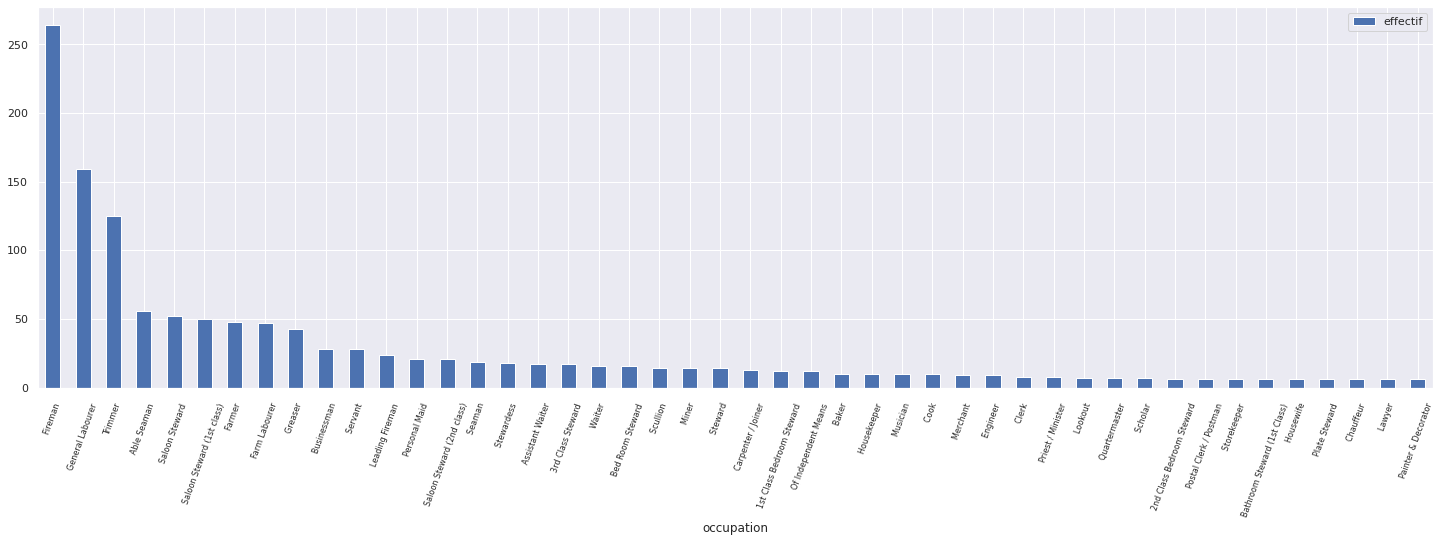

In [182]:
### Affichage des métiers
ax = jobs_vc.query("effectif > 5").plot.bar(x='occupation', y='effectif', rot=70, figsize=(25,7))
ax.tick_params(axis = 'x', labelsize = 8)

### Métiers des passagers

Codage et affichage des métiers

In [183]:
jobs_vc = pd.DataFrame(obs.query("Class.str.contains('Class') & ~Class.str.contains('Musi')").Job.value_counts()[1:])
jobs_vc.reset_index(inplace = True)
jobs_vc.columns = ['occupation', 'effectif']
jobs_vc

,occupation,effectif
0,General Labourer,159
1,Farmer,48
2,Farm Labourer,47
3,Servant,28
4,Businessman,28
...,...,...
153,Theatre Manager,1
154,Domestic Kitchen Servant,1
155,Cook (Personal),1
156,Cinematographer,1


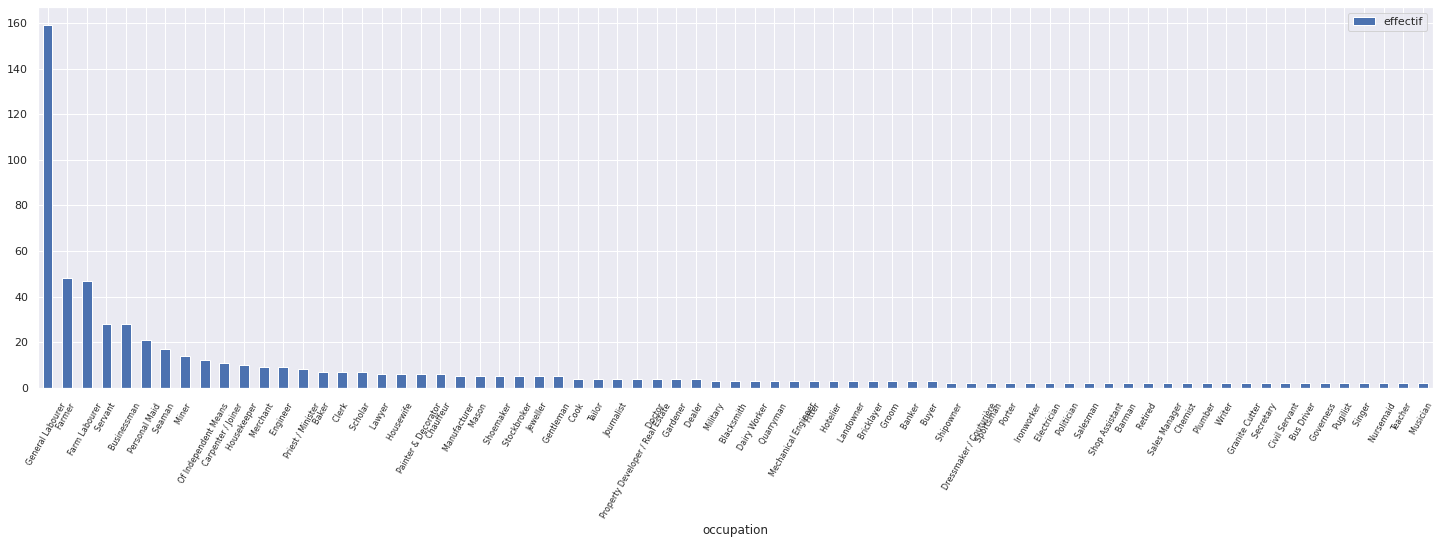

In [187]:
### Affichage des métiers
ax = jobs_vc.query("effectif > 1").plot.bar(x='occupation', y='effectif', rot=60, figsize=(25,7))
ax.tick_params(axis = 'x', labelsize = 8)

In [190]:
### Exporter le fichier en CSV pour pouvoir l'éditer
chemin = 'data/metiers_passagers.csv'
jobs_vc.to_csv(chemin, sep='\t')

#### Créer des classes dans le fichier

* Créer un copie du fichier .csv avec Excel ou Calc, appelée "metiers_passagers_code.csv"
* Ajouter une colonne après 'occupation' et l'appeler 'code'
* Nommer la colonne de l'index: idx
* Regrouper les métiers en 5-10 classes principales, ne mettant le code ou classe dans la colonne 'code'
* Enregistrer et réimporter le fichier

In [201]:
### Exporter le fichier en CSV pour pouvoir l'éditer
chemin_code = 'data/metiers_passagers_code.csv'
jobs_vcc = pd.read_csv(chemin_code, sep='\t', index_col='idx')
jobs_vcc

,occupation,code,effectif
idx,,,
0,General Labourer,ouvrier,159
1,Farmer,paysan,48
2,Farm Labourer,paysan,47
3,Servant,serviteur,28
4,Businessman,commerçant,28
...,...,...,...
153,Theatre Manager,autres,1
154,Domestic Kitchen Servant,autres,1
155,Cook (Personal),autres,1


In [214]:
grp_jobs_vcc = jobs_vcc.groupby('code').sum('effectif').sort_values(by='effectif', ascending=False)
grp_jobs_vcc.reset_index(inplace=True)
grp_jobs_vcc

,code,effectif
0,ouvrier,209
1,autres,135
2,paysan,95
3,serviteur,73
4,cadre et prof. libérale,47
5,commerçant,37
6,artisan,30
7,élite,20
8,cadre inférieur,17
9,marin,17


[]

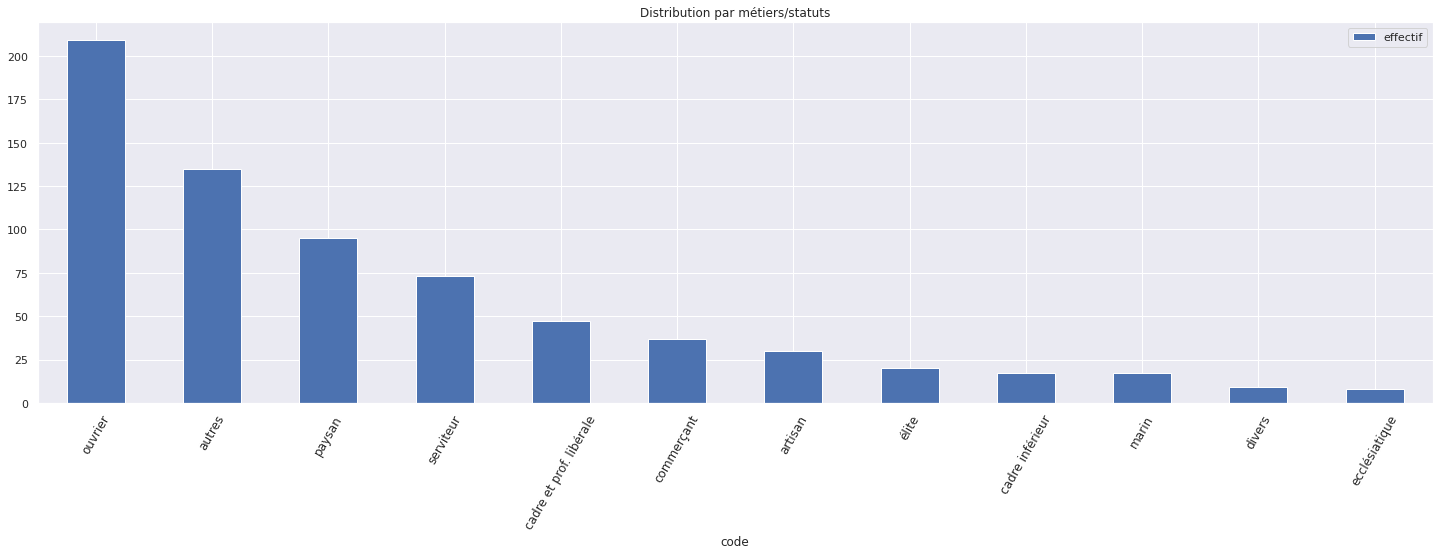

In [221]:
### Affichage des métiers et status
#  noter que dans le fichier exemple tout n'a pas été codé, cf. code 'autres'
ax = grp_jobs_vcc.plot.bar(x = 'code', y='effectif', rot=60, figsize=(25,7))
ax.tick_params(axis = 'x', labelsize = 12)
ax.set_title('Distribution par métiers/statuts')
ax.plot()

# Fate

In [161]:
obs.Fate.value_counts()

Dead        1475
Survivor     980
Name: Fate, dtype: int64

In [162]:
obs.query("Fate == 'Dead'").Class.value_counts().sort_index()

1st Class Passenger                               110
1st Class Passenger\r\nH&W Guarantee Group          3
1st Class Passenger\r\nServant                     10
2nd Class Passenger                               148
2nd Class Passenger\r\nCross Channel Passenger      1
2nd Class Passenger\r\nH&W Guarantee Group          5
2nd Class Passenger\r\nMusician                     8
2nd Class Passenger\r\nServant                      4
3rd Class Passenger                               511
Deck Crew                                          19
Deck Crew\r\nTitanic Officers                       4
Engineering Crew                                  252
Restaurant Staff                                   66
Victualling Crew                                  330
Victualling Crew\r\nPostal Clerk                    4
Name: Class, dtype: int64

In [164]:
obs.query("Fate == 'Survivor' & ~Class.str.contains('Cross')").Class.value_counts().sort_index()

1st Class Passenger                           176
1st Class Passenger\r\nH&W Guarantee Group      1
1st Class Passenger\r\nServant                 28
2nd Class Passenger                           117
2nd Class Passenger\r\nServant                  1
3rd Class Passenger                           198
Deck Crew                                      70
Deck Crew\r\nTitanic Officers                   6
Engineering Crew                              250
Restaurant Staff                                3
Victualling Crew                               99
Name: Class, dtype: int64

# Genre

Inspecter la variable genre et vérifier s'il y a des valeurs vides (vide = null, fonction is_null(), valeur None en Python)

Concernant les valeurs vides, voir Schultz/Bussonnier, 5.4.8

Variable qualitative, deux modalités

In [191]:
### Le résultat de cette méthode est qu'il n'y a pas de valeurs nulles
obs['Sex'].isnull().values.any()

False

In [192]:
### Regrouper par genre et compter les individus par valeur
genre_eff = pd.DataFrame(obs.groupby(by='Sex').size())
genre_eff.columns= ['effectif']
genre_eff.head()

,effectif
Sex,
F,493
M,1962


In [193]:
### Ajouter la fréquence
genre_eff['frequence'] = genre_eff['effectif'].apply(lambda x : (x / genre_eff['effectif'].sum()).round(2))
genre_eff

,effectif,frequence
Sex,,
F,493,0.2
M,1962,0.8


# Analyse des âges

Variable quantitative continue

In [222]:
### On crée un variable qui contient seulement la colonne
#  c'est-à-dire une pandas.Series, la série ou liste de données 'âge'
age = obs['Age']
s_age = age.sort_values() 
type(age), age.head()

(pandas.core.series.Series,
 new_col
 1    42.0
 2    21.0
 3    13.0
 4    16.0
 5    39.0
 Name: Age, dtype: float64)

### Tester s'il y a des valeurs vides

In [223]:
### Méthode permettant de savoir s'il y a des valeurs vides
obs['Age'].isnull().values.any()

True

In [224]:
### Méthode permettant de savoir combienil y a de valeurs vides
obs['Age'].isnull().values.sum()

29

In [225]:
### Quelles sont les lignes avec valeur vide ?
obs[obs['Age'].isnull() == True]

,Name,Age,Class,Ticket,Joined,Job,Fate,Sex,Prix,Prix_dec
new_col,,,,,,,,,,
118,"BAKER (BARKER), Mr John",NaN,Engineering Crew,NaN,Belfast,Fireman,Survivor,M,verifier,77777.000
271,"BRAND, Mr",NaN,1st Class Passenger\r\nCross Channel Passenger,8\r\n£1 10s,Southampton,,Survivor,M,£1 10s,1.500
378,"CARRUTHERS, Mr Francis",NaN,1st Class Passenger,NaN,Belfast,Civil Servant,Survivor,M,verifier,77777.000
393,"CASSIDY, Mr William J.",NaN,Engineering Crew,NaN,Belfast,Trimmer,Survivor,M,verifier,77777.000
461,"COLLIS, Mr",NaN,1st Class Passenger\r\nCross Channel Passenger,7,Southampton,,Survivor,M,verifier,77777.000
563,"DAVIES, Miss K.",NaN,2nd Class Passenger\r\nCross Channel Passenger,406\r\n£2,Southampton,,Survivor,F,£2,2.000
568,"DAVIES, Mr H. V.",NaN,2nd Class Passenger\r\nCross Channel Passenger,406\r\n£2,Southampton,,Survivor,M,£2,2.000
580,"DE GRASSE, Mr J.",NaN,2nd Class Passenger\r\nCross Channel Passenger,761\r\n£1,Southampton,,Survivor,M,£1,1.000
699,"EVANS, Miss",NaN,2nd Class Passenger\r\nCross Channel Passenger,88\r\n£1,Southampton,,Survivor,F,£1,1.000


In [227]:
### Cette méthode d'une série fournit les indicateurs
#  de tendance centrale et de dispersion
age.describe()

count    2426.000000
mean       31.041220
std        11.833691
min         1.000000
25%        23.000000
50%        30.000000
75%        38.000000
max        74.000000
Name: Age, dtype: float64

In [228]:
### La valeur la plus fréquente
age.mode()[0]

22.0

(1.0, 74.0)

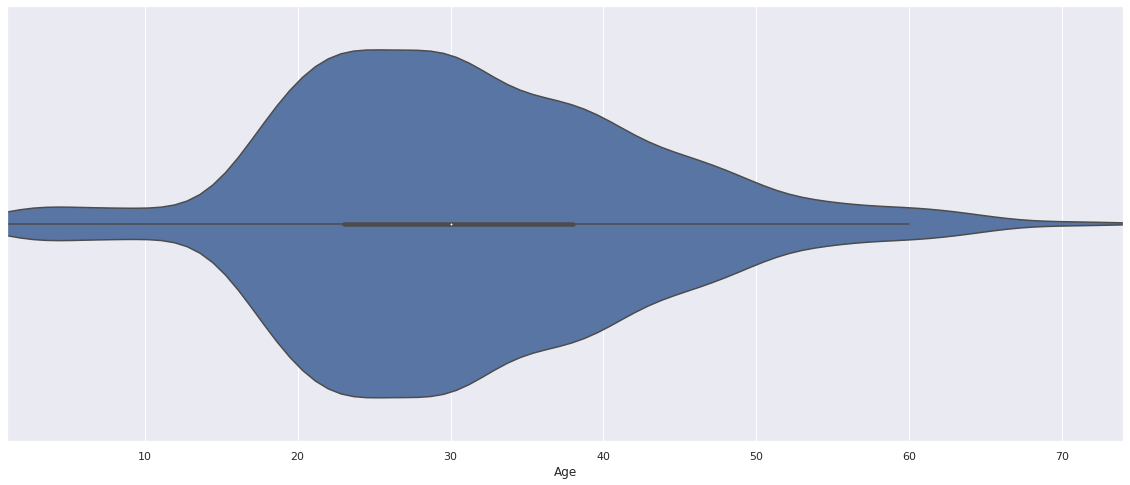

In [240]:
### Distribution des âges 

sns.set_theme(style="whitegrid")

sns.set(rc={"figure.figsize":(20, 8)})

a = obs.Age

ax = sns.violinplot(x=a)

### Noter que au delà des limites les valeurs sont postulées
ax.set_xlim(left=min(a), right=max(a))



(1.0, 38.0)

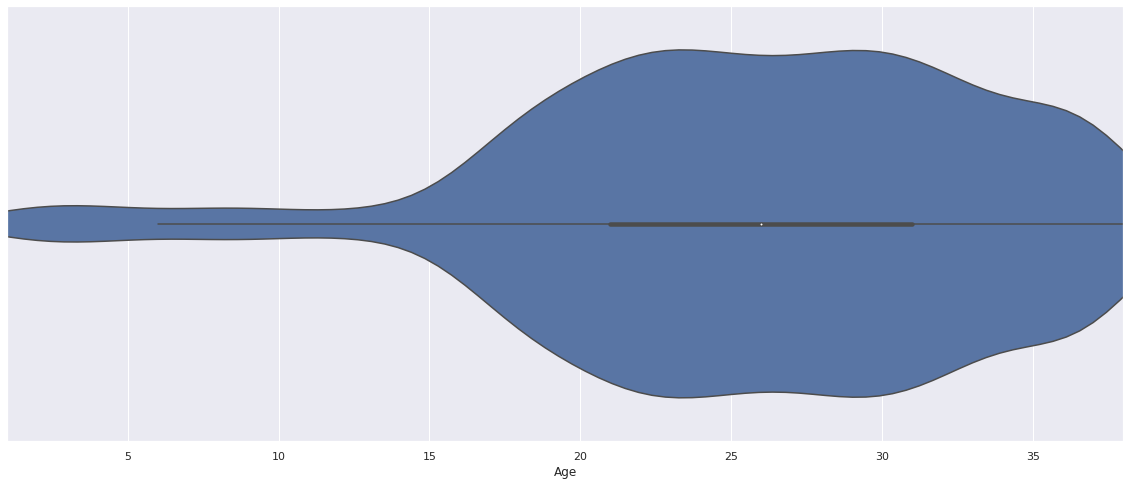

In [241]:
### Distribution des âges des plus jeunes

sns.set_theme(style="whitegrid")

sns.set(rc={"figure.figsize":(20, 8)})

a = obs.query("Age < 39").Age

ax = sns.violinplot(x=a)

### Noter que au delà des limites les valeurs sont postulées
ax.set_xlim(left=min(a), right=max(a))



In [233]:
age_passagers = pd.DataFrame(obs.query("Class.str.contains('Class') & ~Class.str.contains('Musi')").Age)
type(age_passagers),age_passagers

(pandas.core.frame.DataFrame,
           Age
 new_col      
 1        42.0
 3        13.0
 4        16.0
 5        39.0
 6        16.0
 ...       ...
 2451     27.0
 2452     22.0
 2453     23.0
 2454     22.0
 2455     30.0
 
 [1344 rows x 1 columns])

In [244]:
age_passagers.Age.describe()

count    1319.000000
mean       29.983321
std        13.753455
min         1.000000
25%        21.000000
50%        28.000000
75%        39.000000
max        74.000000
Name: Age, dtype: float64

(1.0, 38.0)

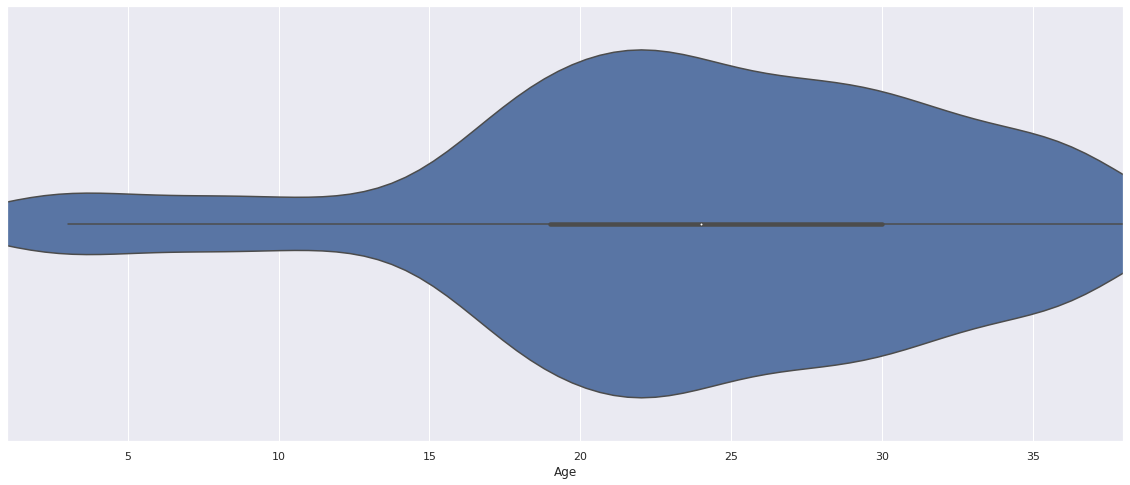

In [246]:
### Age des passager plus jeunes
sns.set_theme(style="whitegrid")

sns.set(rc={"figure.figsize":(20, 8)})

a = age_passagers.query("Age < 39").Age

ax = sns.violinplot(x=a)

### Noter que au delà des limites les valeurs sont postulées
ax.set_xlim(left=min(a), right=max(a))



In [248]:
age_crew = pd.DataFrame(obs.query("~Class.str.contains('Class') | Class.str.contains('Musi')").Age)
type(age_crew),age_crew

(pandas.core.frame.DataFrame,
           Age
 new_col      
 2        21.0
 11       34.0
 14       26.0
 15       20.0
 17       31.0
 ...       ...
 2434     41.0
 2437     40.0
 2439     32.0
 2446     20.0
 2447     26.0
 
 [1111 rows x 1 columns])

In [249]:
age_crew.Age.describe()

count    1107.000000
mean       32.301716
std         8.871354
min        15.000000
25%        25.500000
50%        31.000000
75%        38.000000
max        63.000000
Name: Age, dtype: float64

(15.0, 63.0)

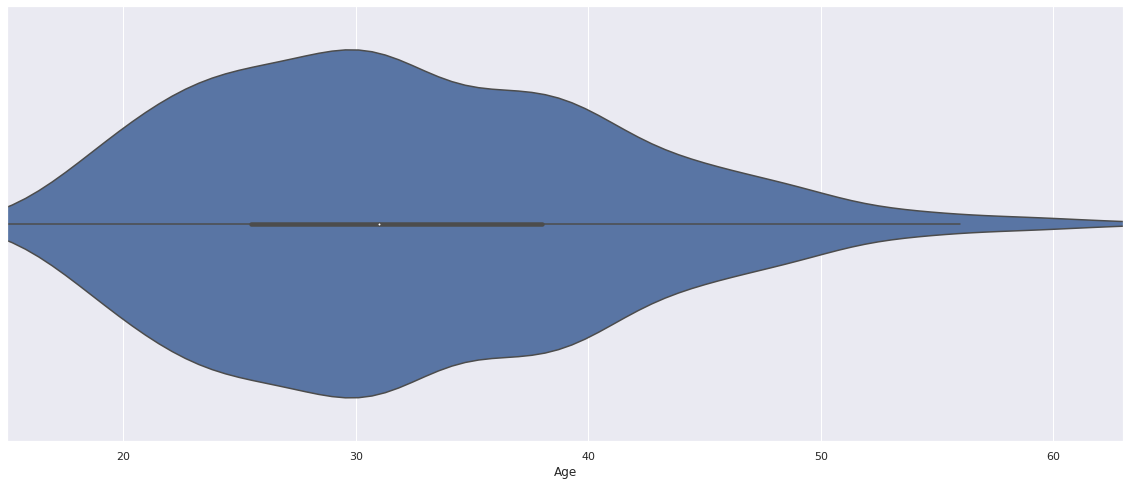

In [251]:
### Age des passager plus jeunes
sns.set_theme(style="whitegrid")

sns.set(rc={"figure.figsize":(20, 8)})

a = age_crew.Age
# a = age_crew.query("Age < 39").Age

ax = sns.violinplot(x=a)

### Noter que au delà des limites les valeurs sont postulées
ax.set_xlim(left=min(a), right=max(a))

